In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [9]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255,x_test/255
print(x_train.shape)

(50000, 32, 32, 3)


In [10]:
#the data is 2d
#convolution expecst height x width x color
y_train=y_train.flatten()
y_test=y_test.flatten()
print(y_train.shape)

(50000,)


In [12]:
k=len(set(y_train))
print(k)

10


In [13]:

#build the model using functionaln api
i=tf.keras.layers.Input(shape=x_train[0].shape)
x=tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=tf.keras.layers.Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=tf.keras.layers.Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(k,activation='softmax')(x)
model=tf.keras.Model(i,x)
     

In [14]:
from keras.engine.training import optimizer
#compile and fit
#note make sure you are using GPU for this
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 64s 40ms/step - loss: 1.5815 - accuracy: 0.4221 - val_loss: 1.2826 - val_accuracy: 0.5365
Epoch 2/15
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2964 - accuracy: 0.5328 - val_loss: 1.1333 - val_accuracy: 0.5952
Epoch 3/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1561 - accuracy: 0.5855 - val_loss: 1.0591 - val_accuracy: 0.6180
Epoch 4/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0651 - accuracy: 0.6198 - val_loss: 0.9826 - val_accuracy: 0.6612
Epoch 5/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9918 - accuracy: 0.6477 - val_loss: 0.9555 - val_accuracy: 0.6608
Epoch 6/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9347 - accuracy: 0.6680 - val_loss: 0.9084 - val_accuracy: 0.6881
Epoch 7/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8842 - accuracy: 0.6854 - val_loss: 0.8940 -

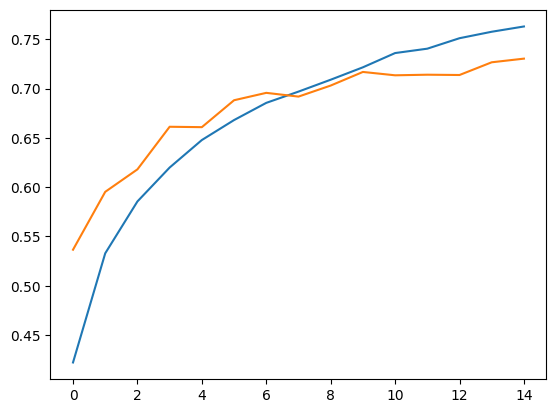

In [16]:

plt.plot(r.history['accuracy'],label="accuracy")
plt.plot(r.history['val_accuracy'],label='val_accuracy')

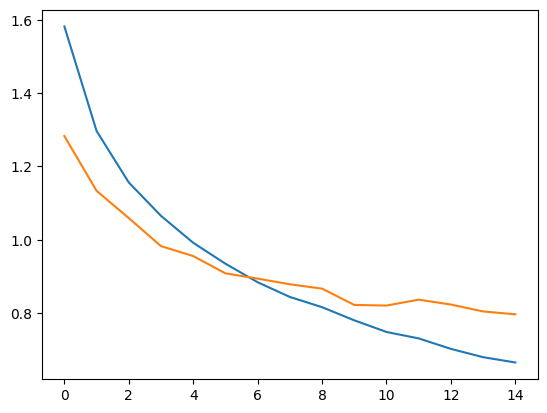

In [17]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label='val_loss')

313/313 [==============================] - 2s 7ms/step
confusion matrix without normalization
cm


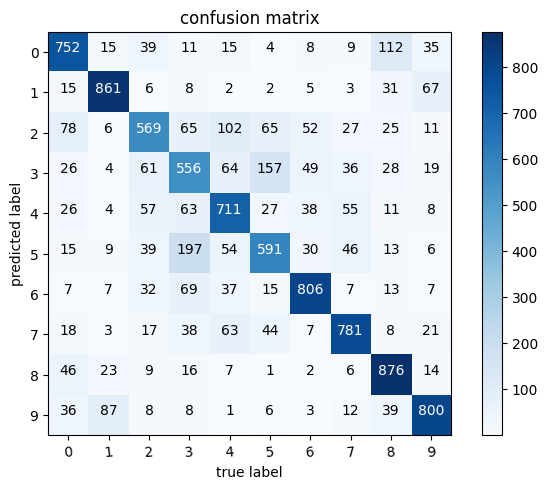

In [18]:
#ploting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalise=False,
                         title='confusion matrix',
                         cmap=plt.cm.Blues):
  ''' this function prints and plots the confusion matrix
  normalization can be applied by setting normalize=True
  '''
  if normalise:
      cm=cm.astype('float')/cm.sum(axis=1)[:,np.new_axis]
      print("normalize confusion matrix")
  else:
        print("confusion matrix without normalization")
        print("cm")
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=5)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalise else "d"
  thresh=cm.max()/2
  for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white'if cm[i,j] >thresh else "black" )
  plt.tight_layout()
  plt.xlabel("true label")
  plt.ylabel('predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'true label: 4 predicted: 0')

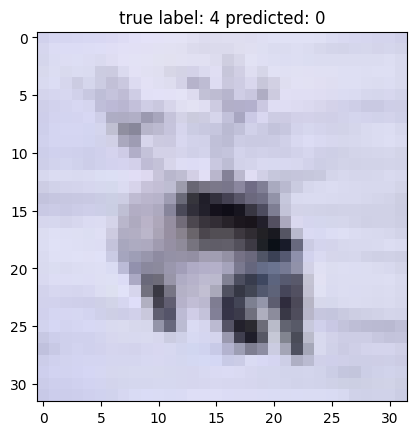

In [21]:
#show some misclassified example
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("true label: %s predicted: %s"%(y_test[i],p_test[i]))